In [8]:
##Import necessary tools
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from matplotlib import reload
from math import radians, cos, sin, asin, sqrt
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools,
    visualisations,
)
import sys
import os
#import glob
#import xarray as xr
#from xarray import Dataset as ds
#import time


#import cmocean
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/CLUSTER/verze2pt0/hind_clfxn/maps_signals')
import cluster_fxn as cf
# sys.path.append(respath)
%matplotlib inline
import scipy.io as sio
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
#grid = mf.import_bathy(bath)
#fmask = (grid.fmask[0,0,:,:])
from IPython.display import Image

In [9]:
## Load data and pick cluster number
vr = 'bio'
ts = 'primary productivity'
year = '2013'
#fname = vr + '_' + year + 'clN.mat'
noday = 365

fname = './datamats/' + vr + '_' + year + 'hind_cl.mat'
ylb = 'primary productivity'

fdir = './figs/'


#tdir = '/data/tjarniko/MEOPAR/at3/notebooks/CLUSTER/verze2pt0/hind_clfxn/maps_signals_nclust/clmats/'
walrus = sio.loadmat(fname)
signalmat = (walrus['signalmat'])


In [10]:
signalmat = (walrus['signalmat'])
print(signalmat.shape)


(580, 1095)


{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Oct  7 08:57:14 2019', '__version__': '1.0', '__globals__': [], 'cl_n': array([[100]], dtype=uint8), 'clustermap': array([[ 94],
       [ 94],
       [ 94],
       [ 94],
       [ 94],
       [ 94],
       [ 94],
       [ 94],
       [ 14],
       [ 14],
       [ 28],
       [ 77],
       [ 96],
       [ 96],
       [ 96],
       [ 48],
       [ 48],
       [ 72],
       [ 72],
       [ 77],
       [ 76],
       [ 73],
       [ 73],
       [ 73],
       [ 72],
       [ 72],
       [ 77],
       [ 76],
       [ 42],
       [ 16],
       [ 16],
       [ 72],
       [ 72],
       [ 77],
       [ 76],
       [ 16],
       [ 16],
       [ 25],
       [ 25],
       [ 77],
       [ 76],
       [ 94],
       [ 42],
       [ 16],
       [ 25],
       [ 25],
       [ 25],
       [ 77],
       [ 76],
       [ 13],
       [ 59],
       [ 43],
       [  3],
       [  4],
       [ 25],
       [ 25],
       [ 77],
       [ 43],
 

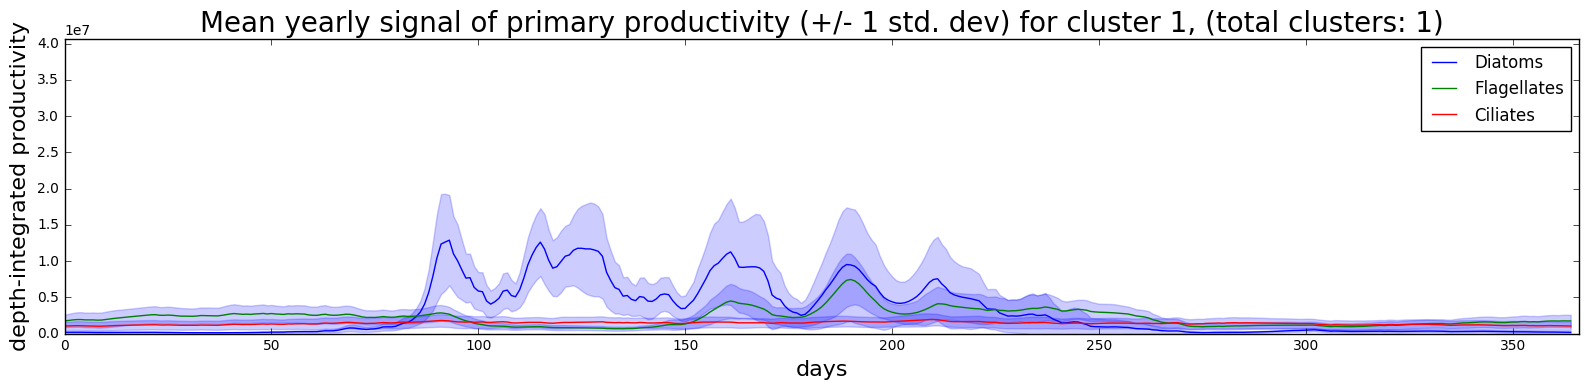

2
2
[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 2
 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 1 2 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 

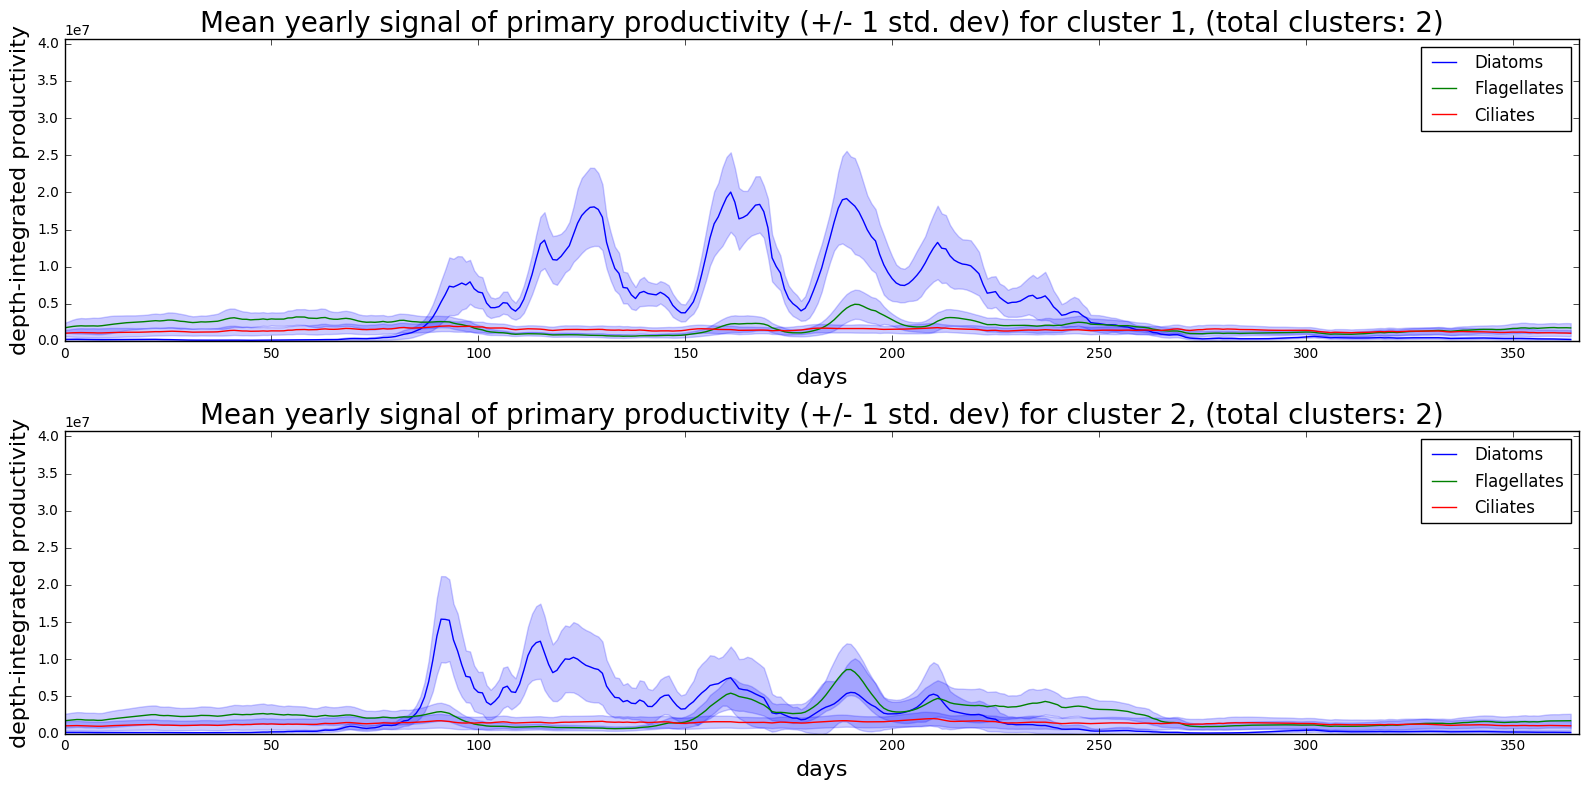

3
3
[1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 1 1 1 1 2 3 3 3 3 3 3 1 1 2 2 2 2 2 2 3 3 3 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 3 3 3 3 3 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 1 3 2
 2 2 2 2 2 2 2 2 3 1 3 3 3 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 1 3 1 2 2 2 1 1 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 3 3 3 1 3 3 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 3 3 3 1 3 3
 3 3 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 1 2 3 3 3 3 3 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 1 3 3 3 3
 3 2 2 2 2 2 2 2 2 1 

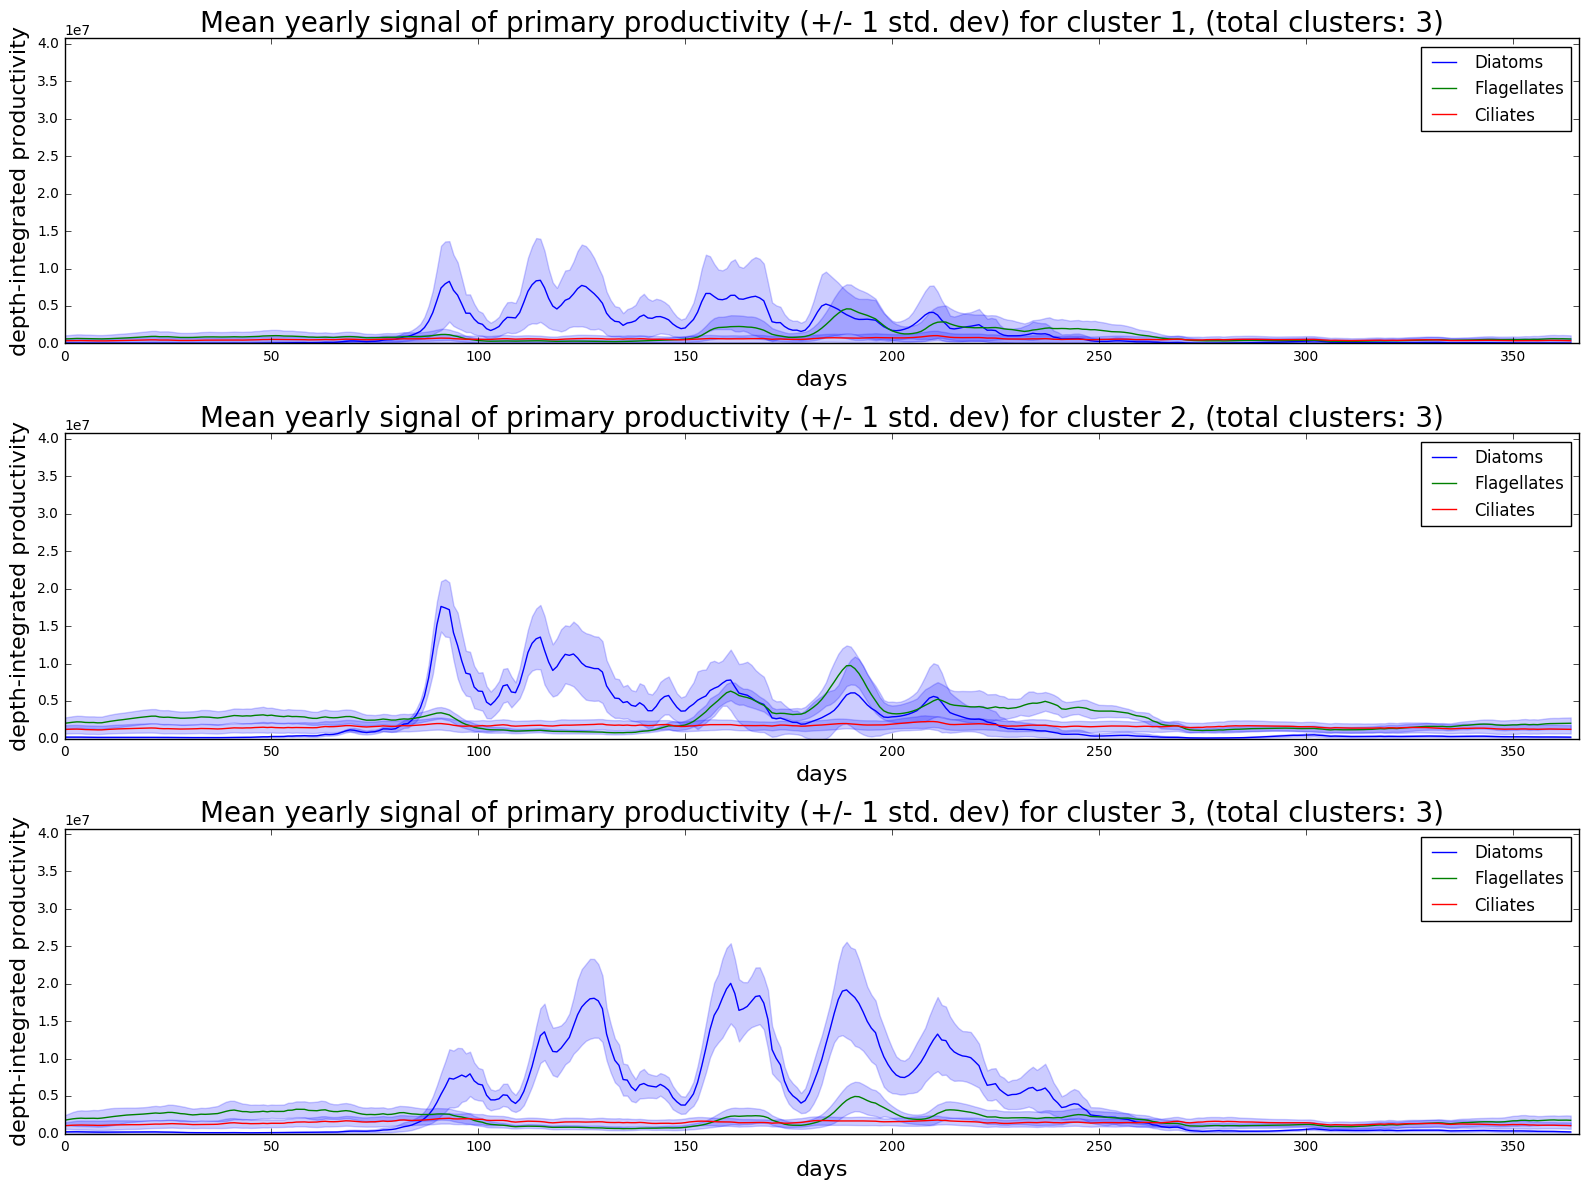

4
4
[3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 3 3 3 3 1 4 4 4 4 4 4 3 3 2 2 2 2 2 2 4 4 4 4 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4
 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 4 4 4 4 4 4 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 4 4 4 3 4 2
 2 2 2 2 2 2 2 2 4 3 4 4 4 4 3 2 2 2 2 2 2 2 2 2 2 2 2 1 1 4 4 4 4 4 4 4 3
 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 4 4 4 4 4 4 3 3 3 3 3 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 1 4 4 4 4 4 3 4 3 1 1 1 3 3 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 4 4 4 4 4 4 4 4 4 4 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 3 4 4 4 3 4 4 4 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 4 1 1 1 4 4 4 4 3 4 4
 4 4 3 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 4 1 3 1 4 4 4 4 4 1 3 1 2 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 3 4 4 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 4 2 2 3 4 4 4 4
 4 1 1 1 1 1 1 1 1 3 

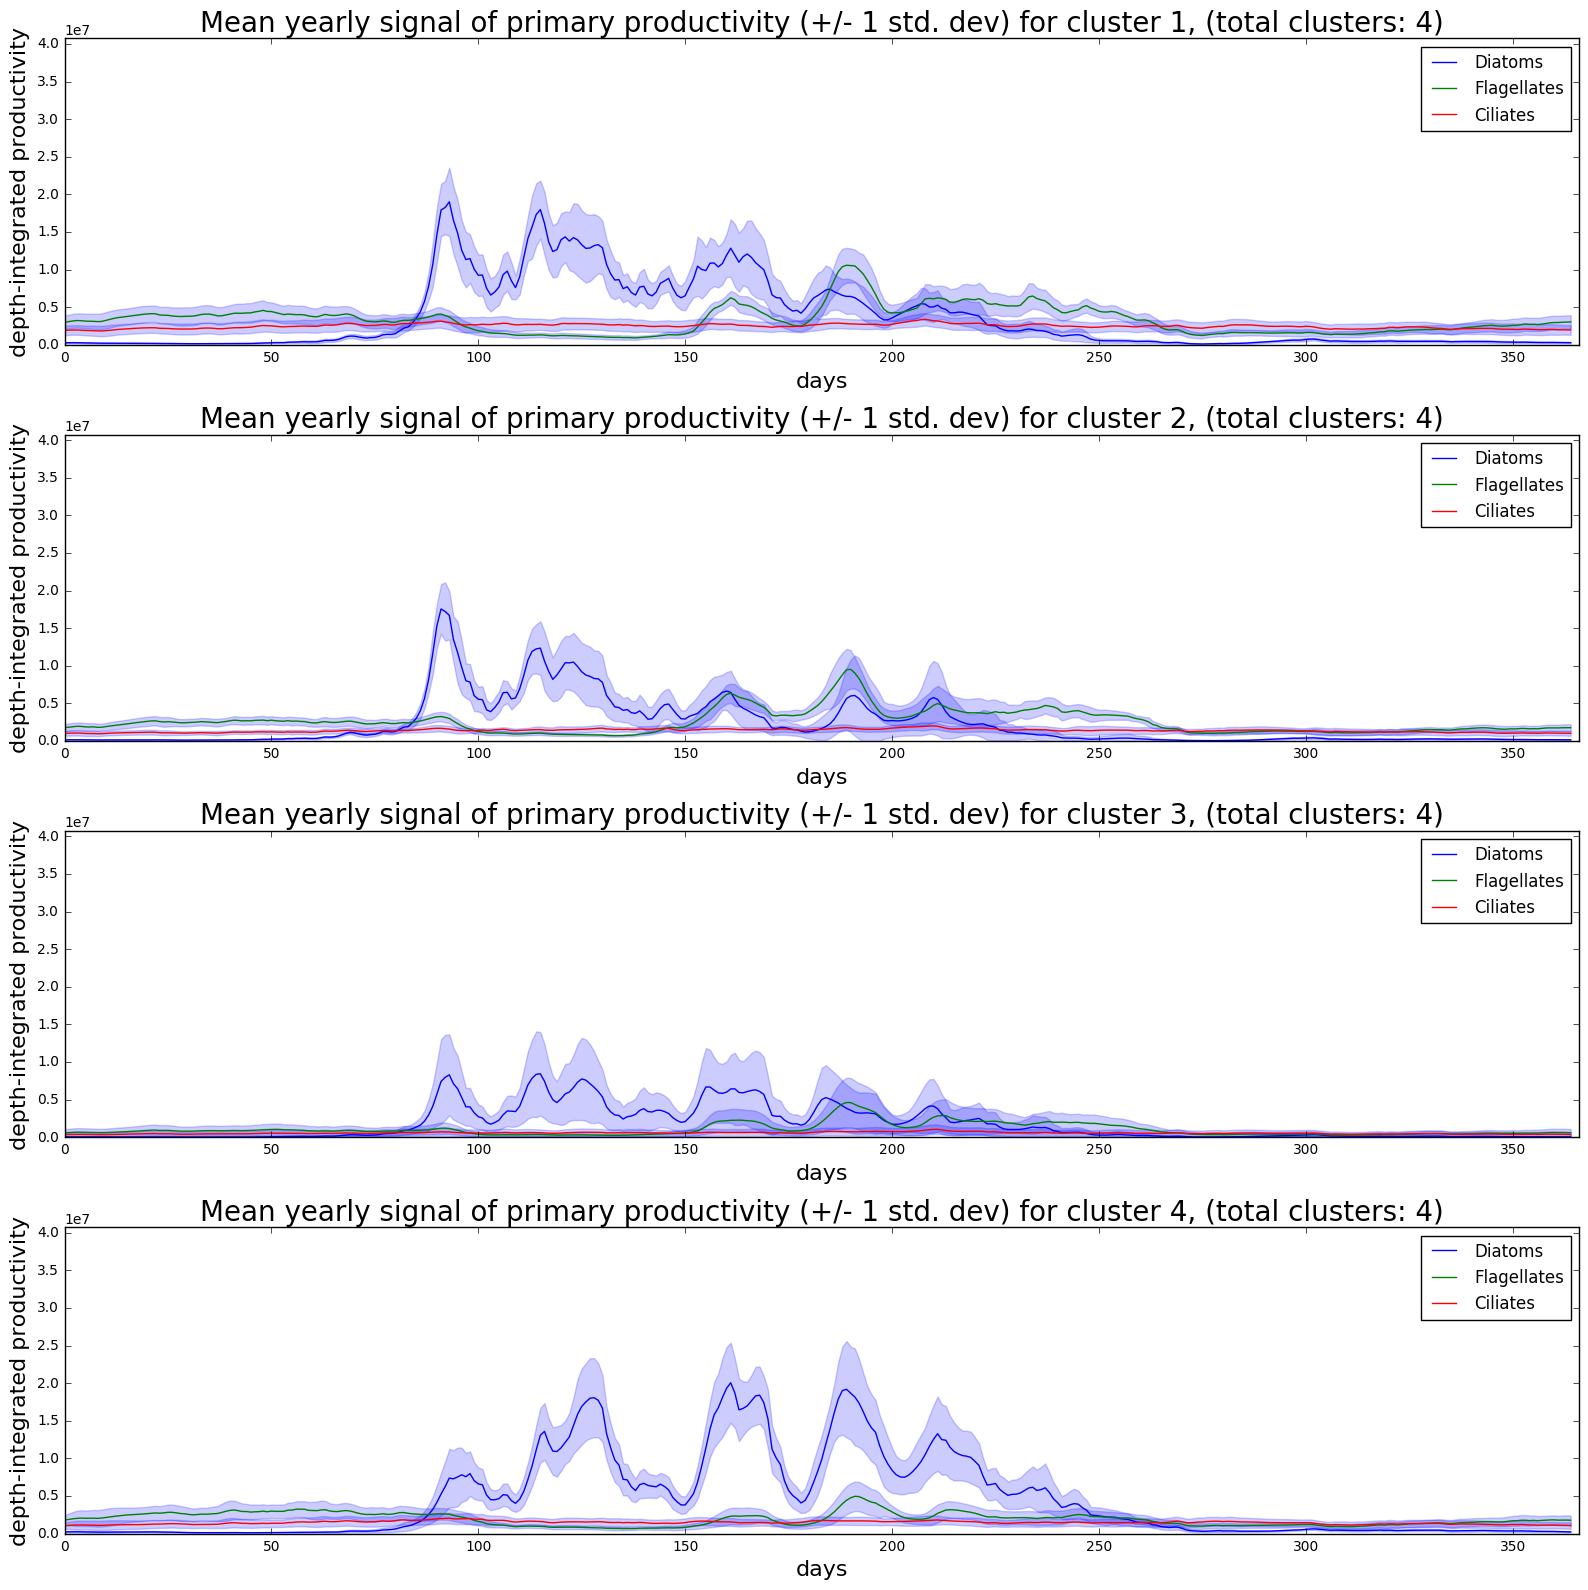

5
5
[4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 4 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 4 4 4 4 3 5 5 5 5 5 5 4 4 1 1 1 1 1 2 5 5 5 5 2 2 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 2 5 5 5 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 5 5
 5 5 5 5 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 1 2 5 5 5 5 5 5 4 2 2 2 2 2 2 2 2 1 1 1 1 1 1 5 2 5 5 5 5 4 5 2
 2 2 2 2 1 1 1 1 5 4 5 5 5 5 4 2 2 2 2 2 2 2 2 2 1 1 1 3 3 5 5 5 5 5 5 5 4
 4 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 3 3 3 5 5 5 5 5 5 4 4 4 4 4 4 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 3 3 5 5 5 5 5 4 5 4 3 3 3 4 4 2 2 4 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 3 3 3 5 5 5 5 5 5 5 5 5 5 3 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 3 4 5 5 5 4 5 5 5 4 3 2 2 2 2 2 2 2 2 2 2 2 2 2 5 3 3 3 5 5 5 5 4 5 5
 5 5 4 3 4 2 2 2 2 2 2 2 2 2 2 2 2 2 5 3 4 3 5 5 5 5 5 3 4 3 2 3 3 3 3 3 2
 2 2 2 2 2 2 2 2 2 4 5 5 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 5 2 2 4 5 5 5 5
 5 3 3 3 3 3 3 3 3 4 

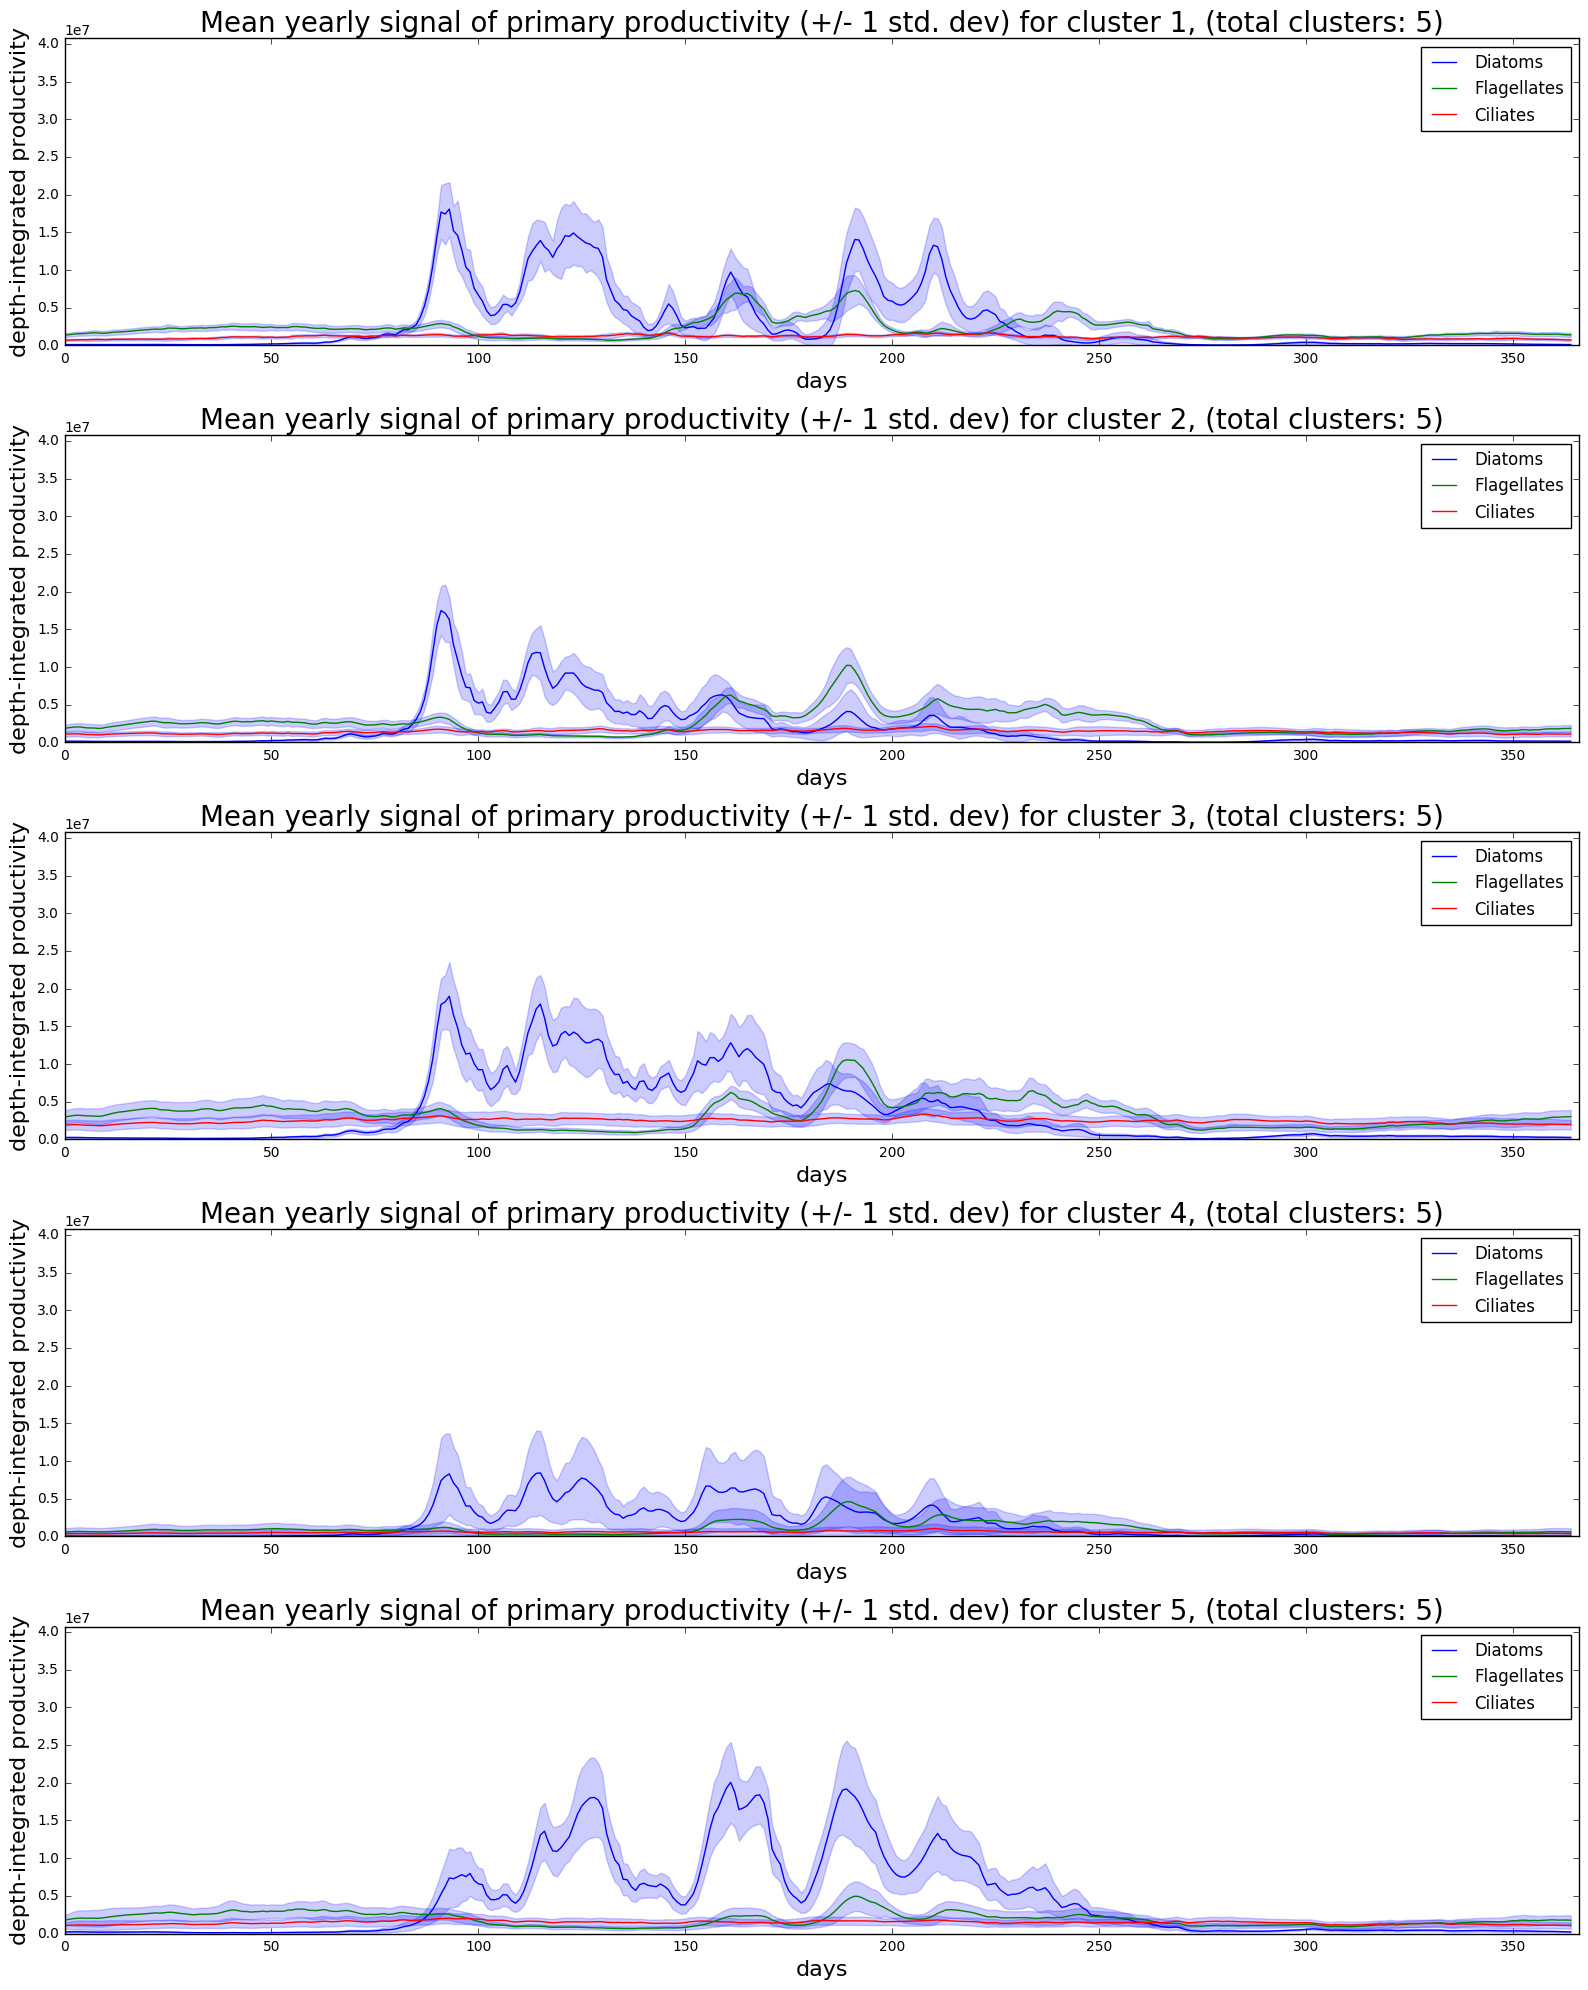

6
6
[6 6 6 6 6 6 6 6 6 6 2 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 1 1 6 1 1 2 2 2 1 1 6 2 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 2 1 2
 2 1 2 2 2 2 1 2 2 2 6 6 6 6 5 2 1 2 2 2 2 6 6 3 3 3 3 3 4 2 1 2 2 4 4 4 4
 4 4 3 3 3 3 3 3 3 3 3 3 4 1 2 2 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 4 4 2 1
 1 2 2 2 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 1 1 2 2 2 2 4 4 4 4 4 4 4 4 4 4 3
 3 3 3 3 3 3 4 1 2 2 2 2 2 6 4 4 4 4 4 4 4 4 3 3 3 3 3 3 2 4 1 2 2 2 6 2 4
 4 4 4 4 3 3 3 3 2 6 1 2 2 2 6 4 4 4 4 4 4 4 4 4 3 3 3 5 5 1 1 1 1 2 2 2 6
 6 4 4 4 4 4 4 4 4 4 4 4 4 3 3 5 5 5 5 1 2 2 2 2 2 6 6 6 6 6 6 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 3 5 5 1 2 2 2 2 6 2 6 5 5 5 6 6 4 4 6 4 4 4 4 4 4 4
 4 4 4 4 4 4 3 5 5 5 2 1 2 2 2 2 2 2 2 2 5 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 5 5 6 2 2 2 6 2 2 2 6 5 4 4 4 4 4 4 4 4 4 4 4 4 4 2 5 5 5 1 1 2 2 6 2 2
 2 2 6 5 6 4 4 4 4 4 4 4 4 4 4 4 4 4 2 5 6 5 2 2 2 2 2 5 6 5 4 5 5 5 5 5 4
 4 4 4 4 4 4 4 4 4 6 2 2 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 2 4 4 6 2 2 2 2
 2 5 5 5 5 5 5 5 5 6 

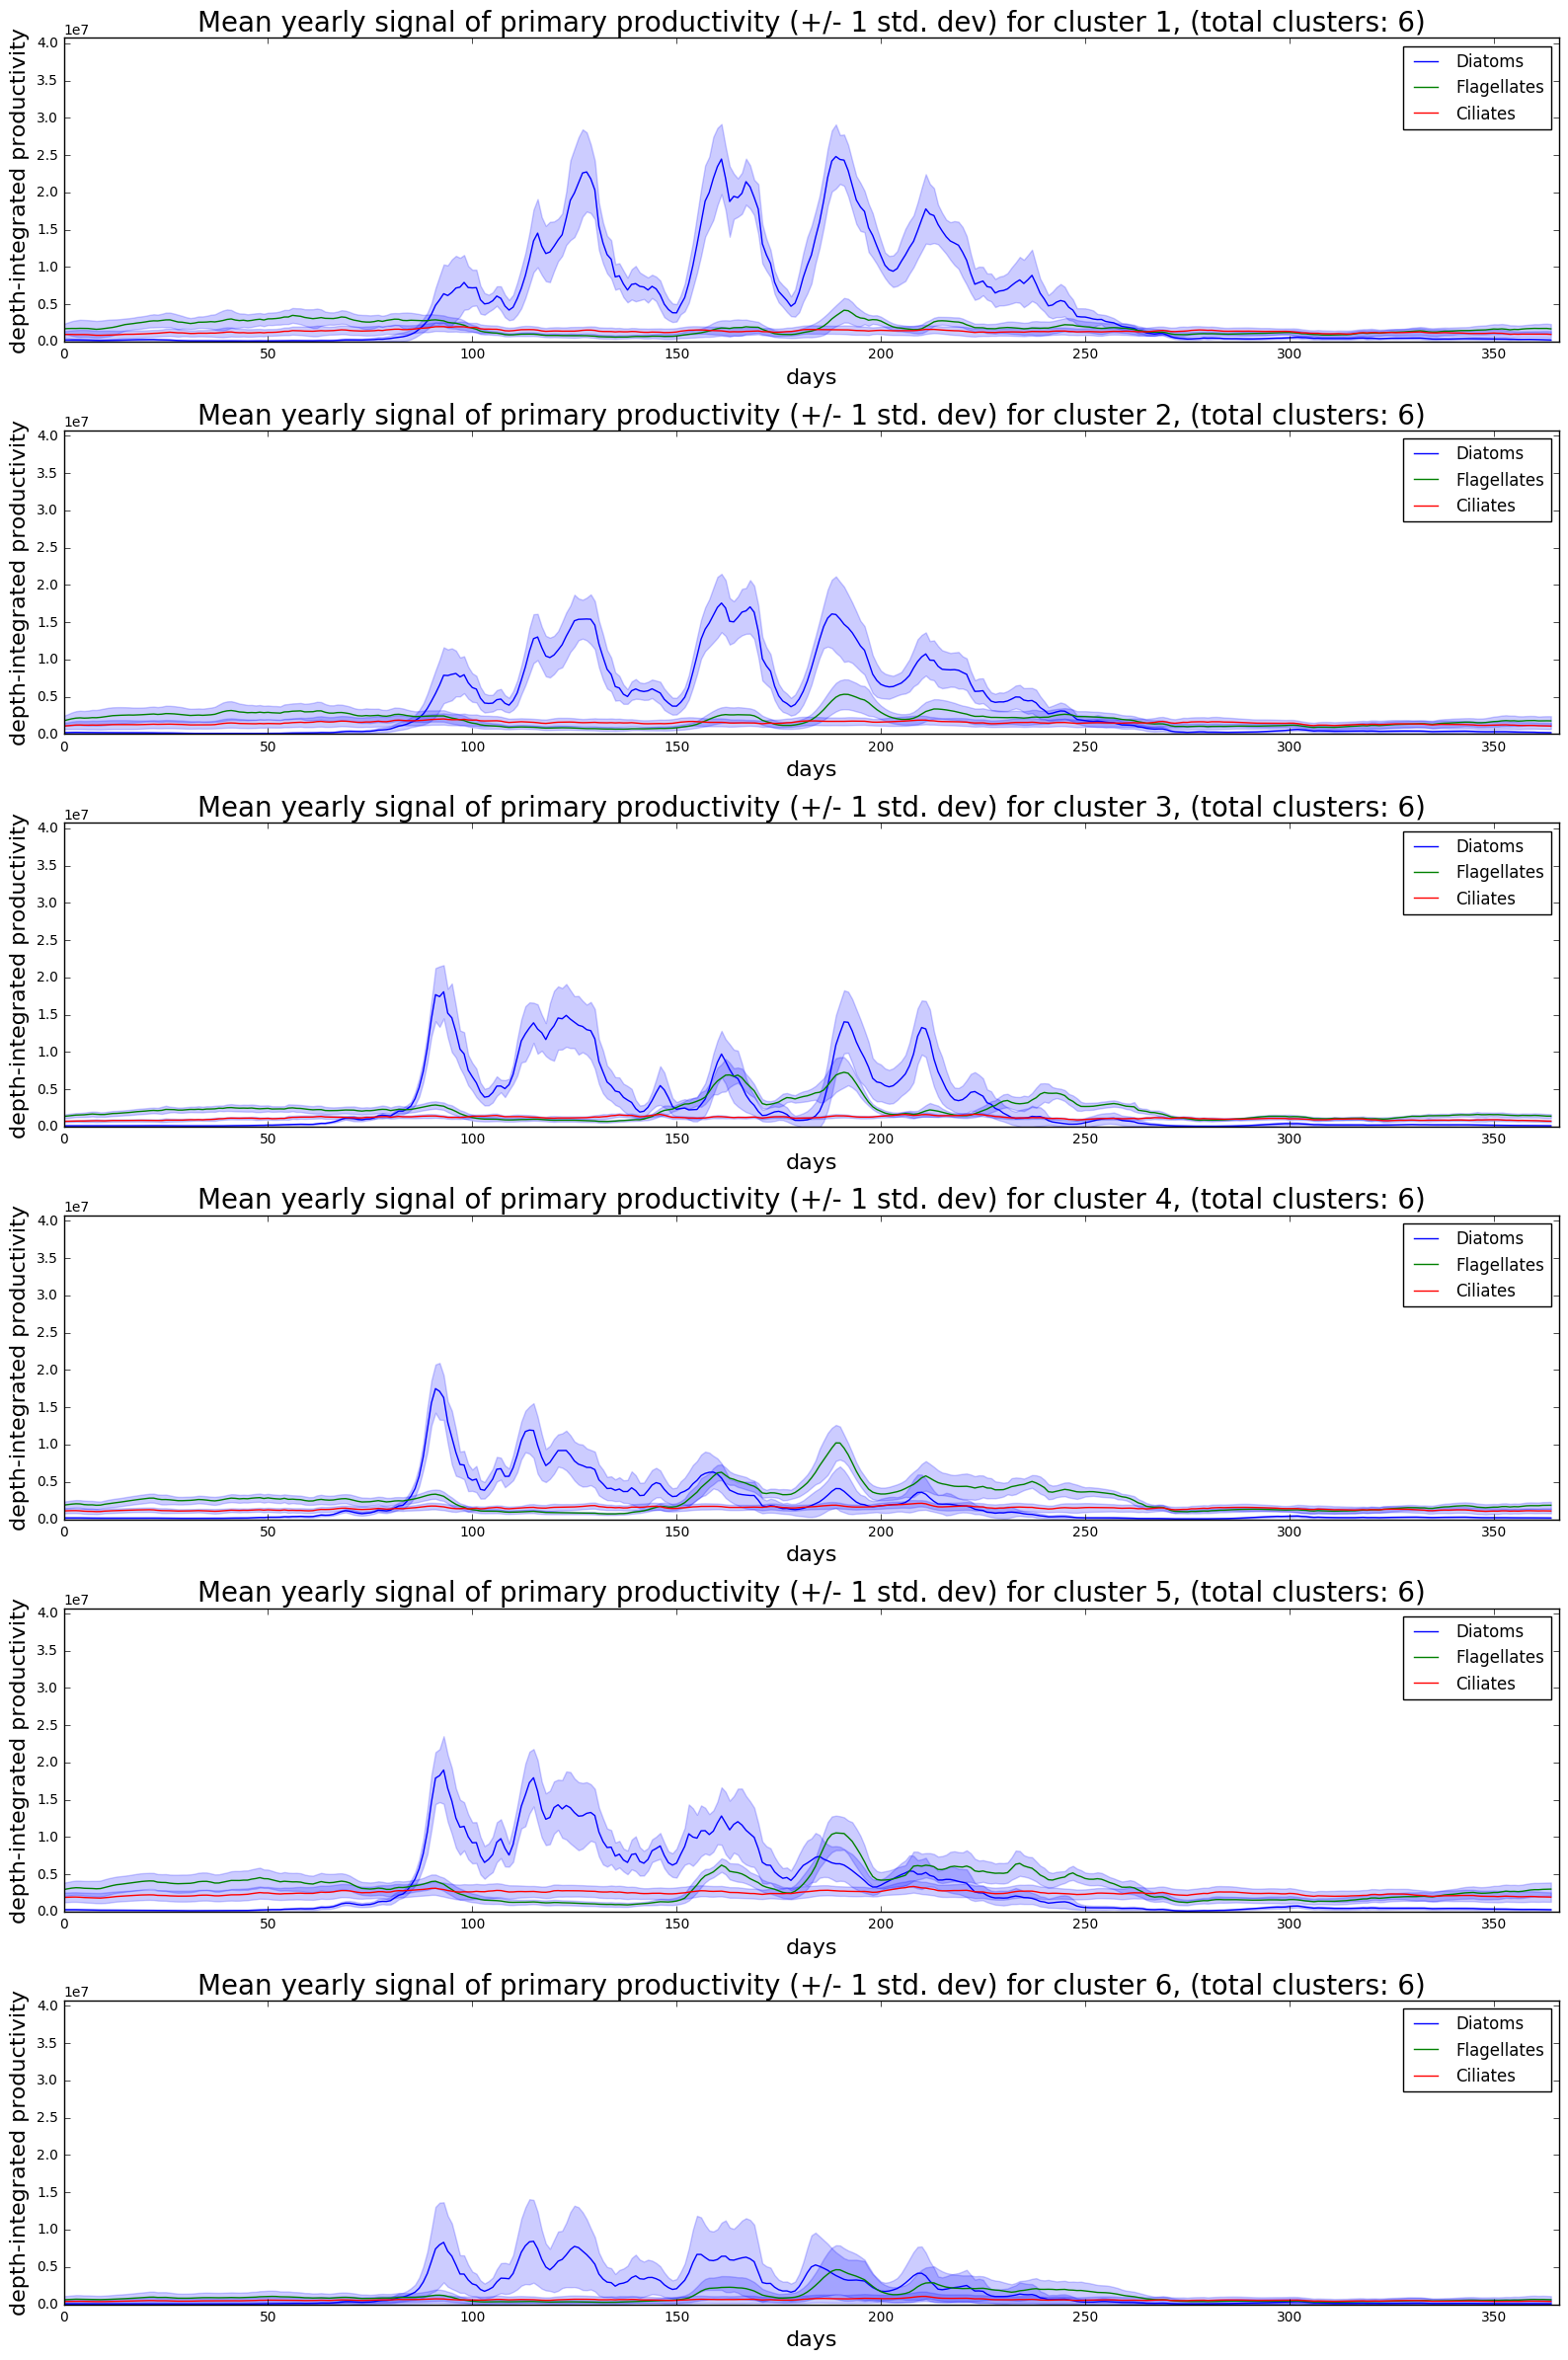

7
7
[1 1 1 1 1 1 1 1 2 2 4 3 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 4 4 3 3 1 3 3 4 4 4 3 3 2 4 3 3 3 4 4 3 3 3 3 3 4 4 3 3 3 3 4 4 4 3 4 3 4
 4 3 4 4 4 4 3 4 4 4 2 2 2 2 7 4 3 4 4 4 4 1 2 5 5 5 5 5 6 4 3 4 4 6 6 6 6
 6 6 5 5 5 5 5 5 5 5 5 5 6 3 4 4 6 6 6 6 6 6 6 5 5 5 5 5 5 5 5 5 5 6 6 4 3
 3 4 4 4 6 6 6 6 6 6 6 6 6 5 5 5 5 5 5 5 3 3 4 4 4 4 6 6 6 6 6 6 6 6 6 6 5
 5 5 5 5 5 5 6 3 4 4 4 4 4 2 6 6 6 6 6 6 6 6 5 5 5 5 5 5 4 6 3 4 4 4 2 4 6
 6 6 6 6 5 5 5 5 4 2 3 4 4 4 2 6 6 6 6 6 6 6 6 6 5 5 5 7 7 3 3 3 3 4 4 4 2
 2 6 6 6 6 6 6 6 6 6 6 6 6 5 5 7 7 7 7 3 4 4 4 4 4 2 2 2 2 2 2 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 5 7 7 3 4 4 4 4 2 4 2 7 7 7 2 2 6 6 2 6 6 6 6 6 6 6
 6 6 6 6 6 6 5 7 7 7 4 3 4 4 4 4 4 4 4 4 7 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 7 7 2 4 4 4 2 4 4 4 2 7 6 6 6 6 6 6 6 6 6 6 6 6 6 4 7 7 7 3 3 4 4 2 4 4
 4 4 2 7 2 6 6 6 6 6 6 6 6 6 6 6 6 6 4 7 2 7 4 4 4 4 4 7 2 7 6 7 7 7 7 7 6
 6 6 6 6 6 6 6 6 6 2 4 4 7 7 7 7 7 7 7 7 7 7 6 6 6 6 6 6 6 4 6 6 2 4 4 4 4
 4 7 7 7 7 7 7 7 7 2 

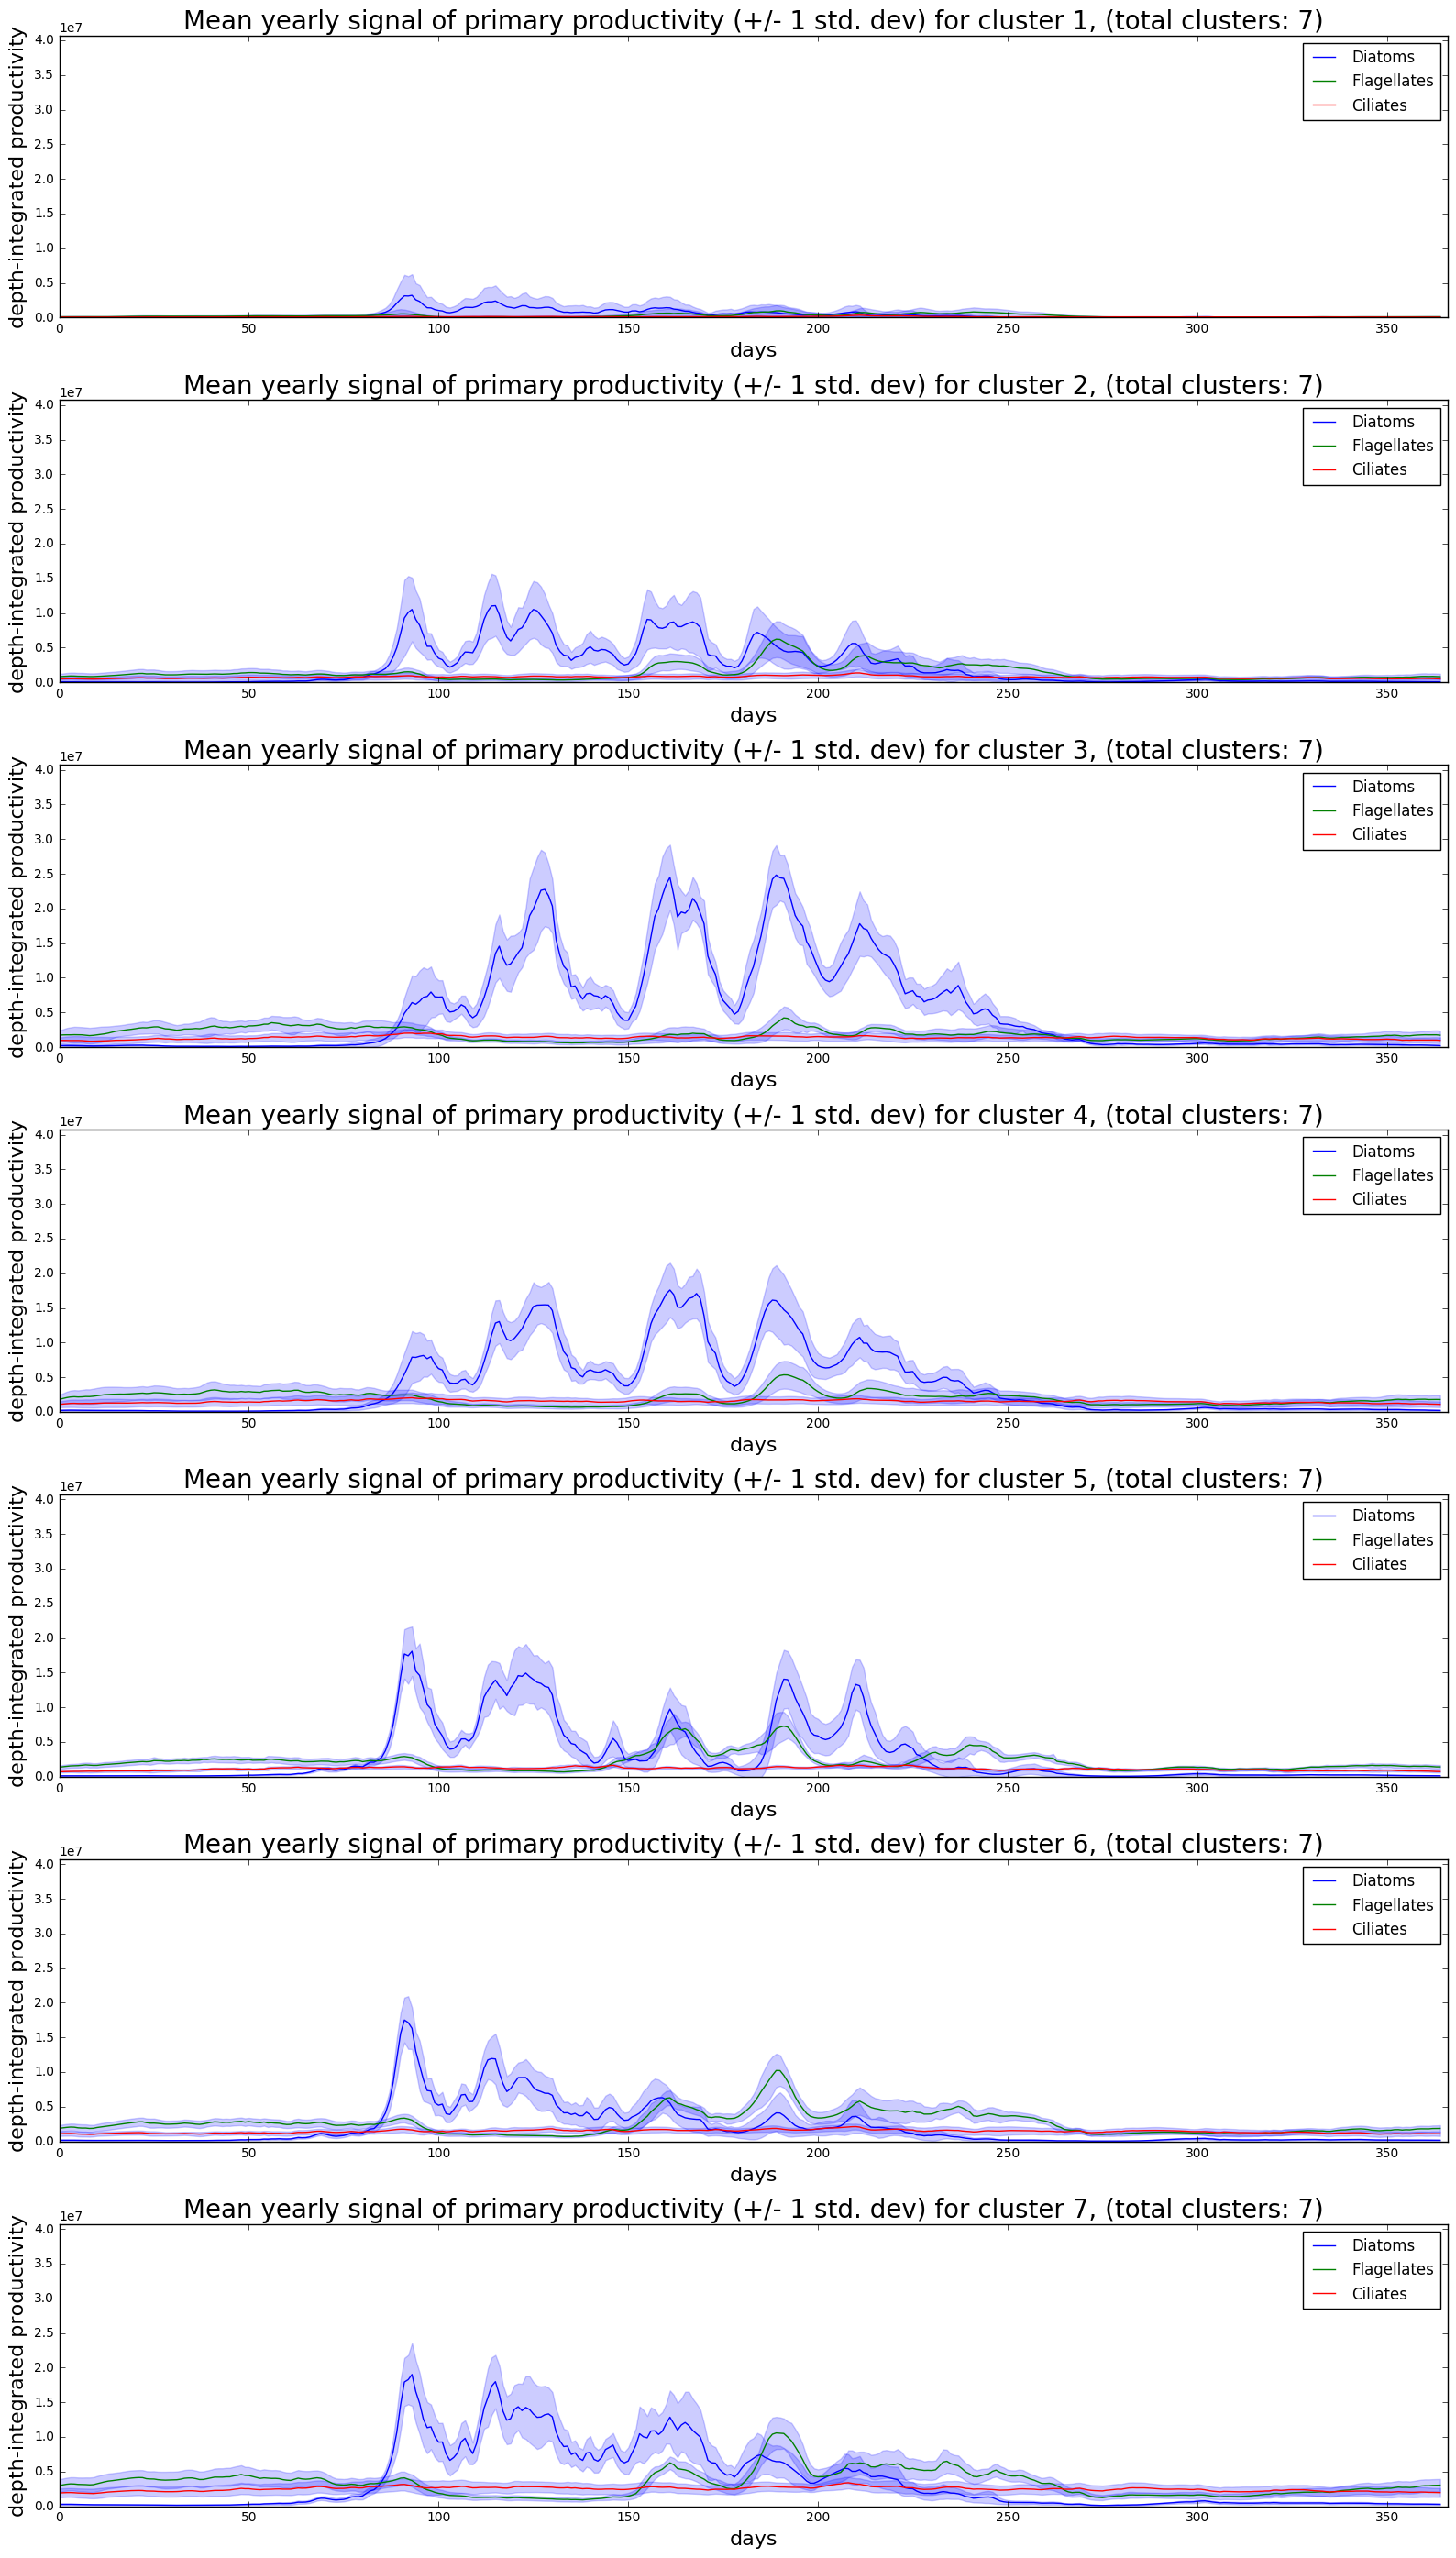

8
8
[3 3 3 3 3 3 3 3 4 4 6 5 6 6 6 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 6 6 5 5 3 5 5 6 6 6 5 5 4 6 5 5 5 6 6 5 5 5 5 5 6 6 5 5 5 5 6 6 6 5 6 5 6
 6 5 6 6 6 6 5 6 6 6 4 4 4 4 2 6 5 6 6 6 6 3 4 7 7 7 7 7 8 6 5 6 6 8 8 8 8
 8 8 7 7 7 7 7 7 7 7 7 7 8 5 6 6 8 8 8 8 8 8 8 7 7 7 7 7 7 7 7 7 7 8 8 6 5
 5 6 6 6 8 8 8 8 8 8 8 8 8 7 7 7 7 7 7 7 5 5 6 6 6 6 8 8 8 8 8 8 8 8 8 8 7
 7 7 7 7 7 7 8 5 6 6 6 6 6 4 8 8 8 8 8 8 8 8 7 7 7 7 7 7 6 8 5 6 6 6 4 6 8
 8 8 8 8 7 7 7 7 6 4 5 6 6 6 4 8 8 8 8 8 8 8 8 8 7 7 7 2 2 5 5 5 5 6 6 6 4
 4 8 8 8 8 8 8 8 8 8 8 8 8 7 7 2 2 2 2 5 6 6 6 6 6 4 4 4 4 4 4 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 7 2 2 5 6 6 6 6 4 6 4 1 1 1 4 4 8 8 4 8 8 8 8 8 8 8
 8 8 8 8 8 8 7 2 2 2 6 5 6 6 6 6 6 6 6 6 1 4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 1 2 4 6 6 6 4 6 6 6 4 1 8 8 8 8 8 8 8 8 8 8 8 8 8 6 1 1 1 5 5 6 6 4 6 6
 6 6 4 1 4 8 8 8 8 8 8 8 8 8 8 8 8 8 6 1 4 2 6 6 6 6 6 1 4 1 8 2 2 2 2 2 8
 8 8 8 8 8 8 8 8 8 4 6 6 1 1 2 2 2 2 2 2 2 2 8 8 8 8 8 8 8 6 8 8 4 6 6 6 6
 6 1 2 2 1 2 2 2 2 4 

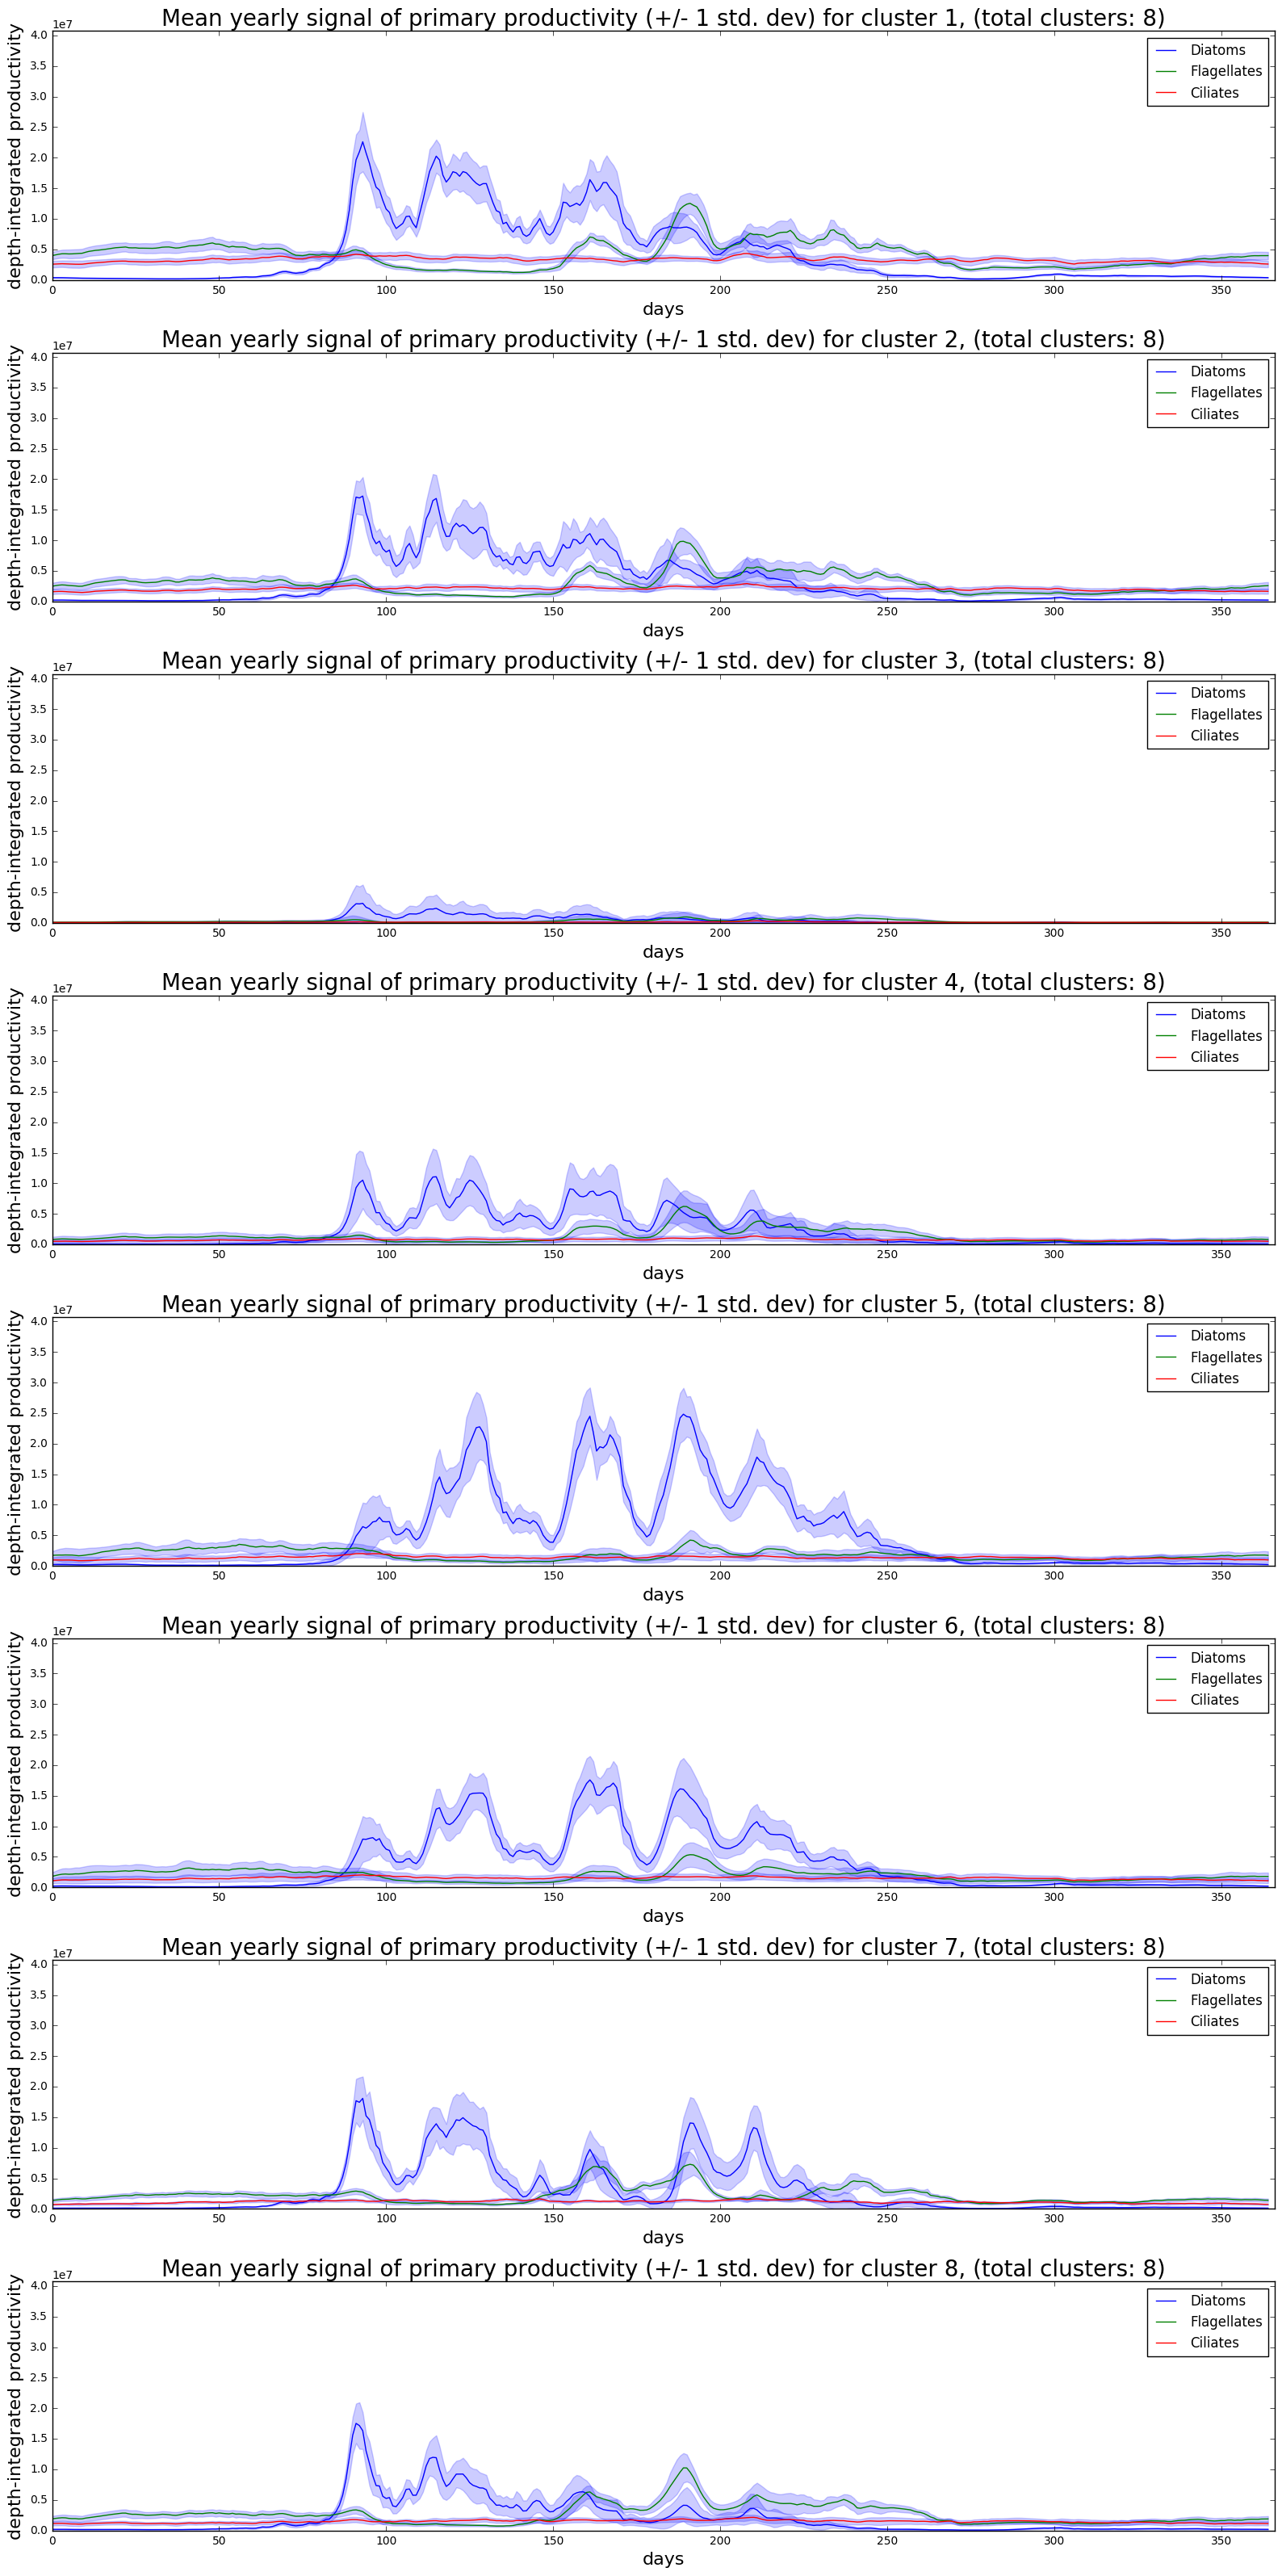

9
9
[5 5 5 5 5 5 5 5 6 6 1 7 1 1 1 1 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 2 2 7 7 5 7 7 2 2 2 7 7 6 1 7 7 7 2 2 7 7 7 7 7 2 2 7 7 7 7 2 2 1 7 2 7 2
 2 7 2 2 2 2 7 2 2 2 6 6 6 6 4 1 7 2 2 2 1 5 6 8 8 8 8 8 9 1 7 2 2 9 9 9 9
 9 9 8 8 8 8 8 8 8 8 8 8 9 7 2 2 9 9 9 9 9 9 9 8 8 8 8 8 8 8 8 8 8 9 9 1 7
 7 2 2 2 9 9 9 9 9 9 9 9 9 8 8 8 8 8 8 8 7 7 2 2 2 2 9 9 9 9 9 9 9 9 9 9 8
 8 8 8 8 8 8 9 7 1 1 2 2 2 6 9 9 9 9 9 9 9 9 8 8 8 8 8 8 2 9 7 2 2 2 6 2 9
 9 9 9 9 8 8 8 8 2 6 7 2 2 2 6 9 9 9 9 9 9 9 9 9 8 8 8 4 4 7 7 7 7 2 2 2 6
 6 9 9 9 9 9 9 9 9 9 9 9 9 8 8 4 4 4 4 7 1 2 1 2 2 6 6 6 6 6 6 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 8 4 4 7 1 2 2 2 6 2 6 3 3 3 6 6 9 9 6 9 9 9 9 9 9 9
 9 9 9 9 9 9 8 4 4 4 1 7 2 2 2 2 2 2 2 2 3 6 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 3 4 6 2 1 2 6 2 2 2 6 3 9 9 9 9 9 9 9 9 9 9 9 9 9 1 3 3 3 7 7 2 1 6 2 2
 2 2 6 3 6 9 9 9 9 9 9 9 9 9 9 9 9 9 1 3 6 4 2 1 1 2 2 3 6 3 9 4 4 4 4 4 9
 9 9 9 9 9 9 9 9 9 6 1 2 3 3 4 4 4 4 4 4 4 4 9 9 9 9 9 9 9 1 9 9 6 1 1 2 1
 2 3 4 4 3 4 4 4 4 6 

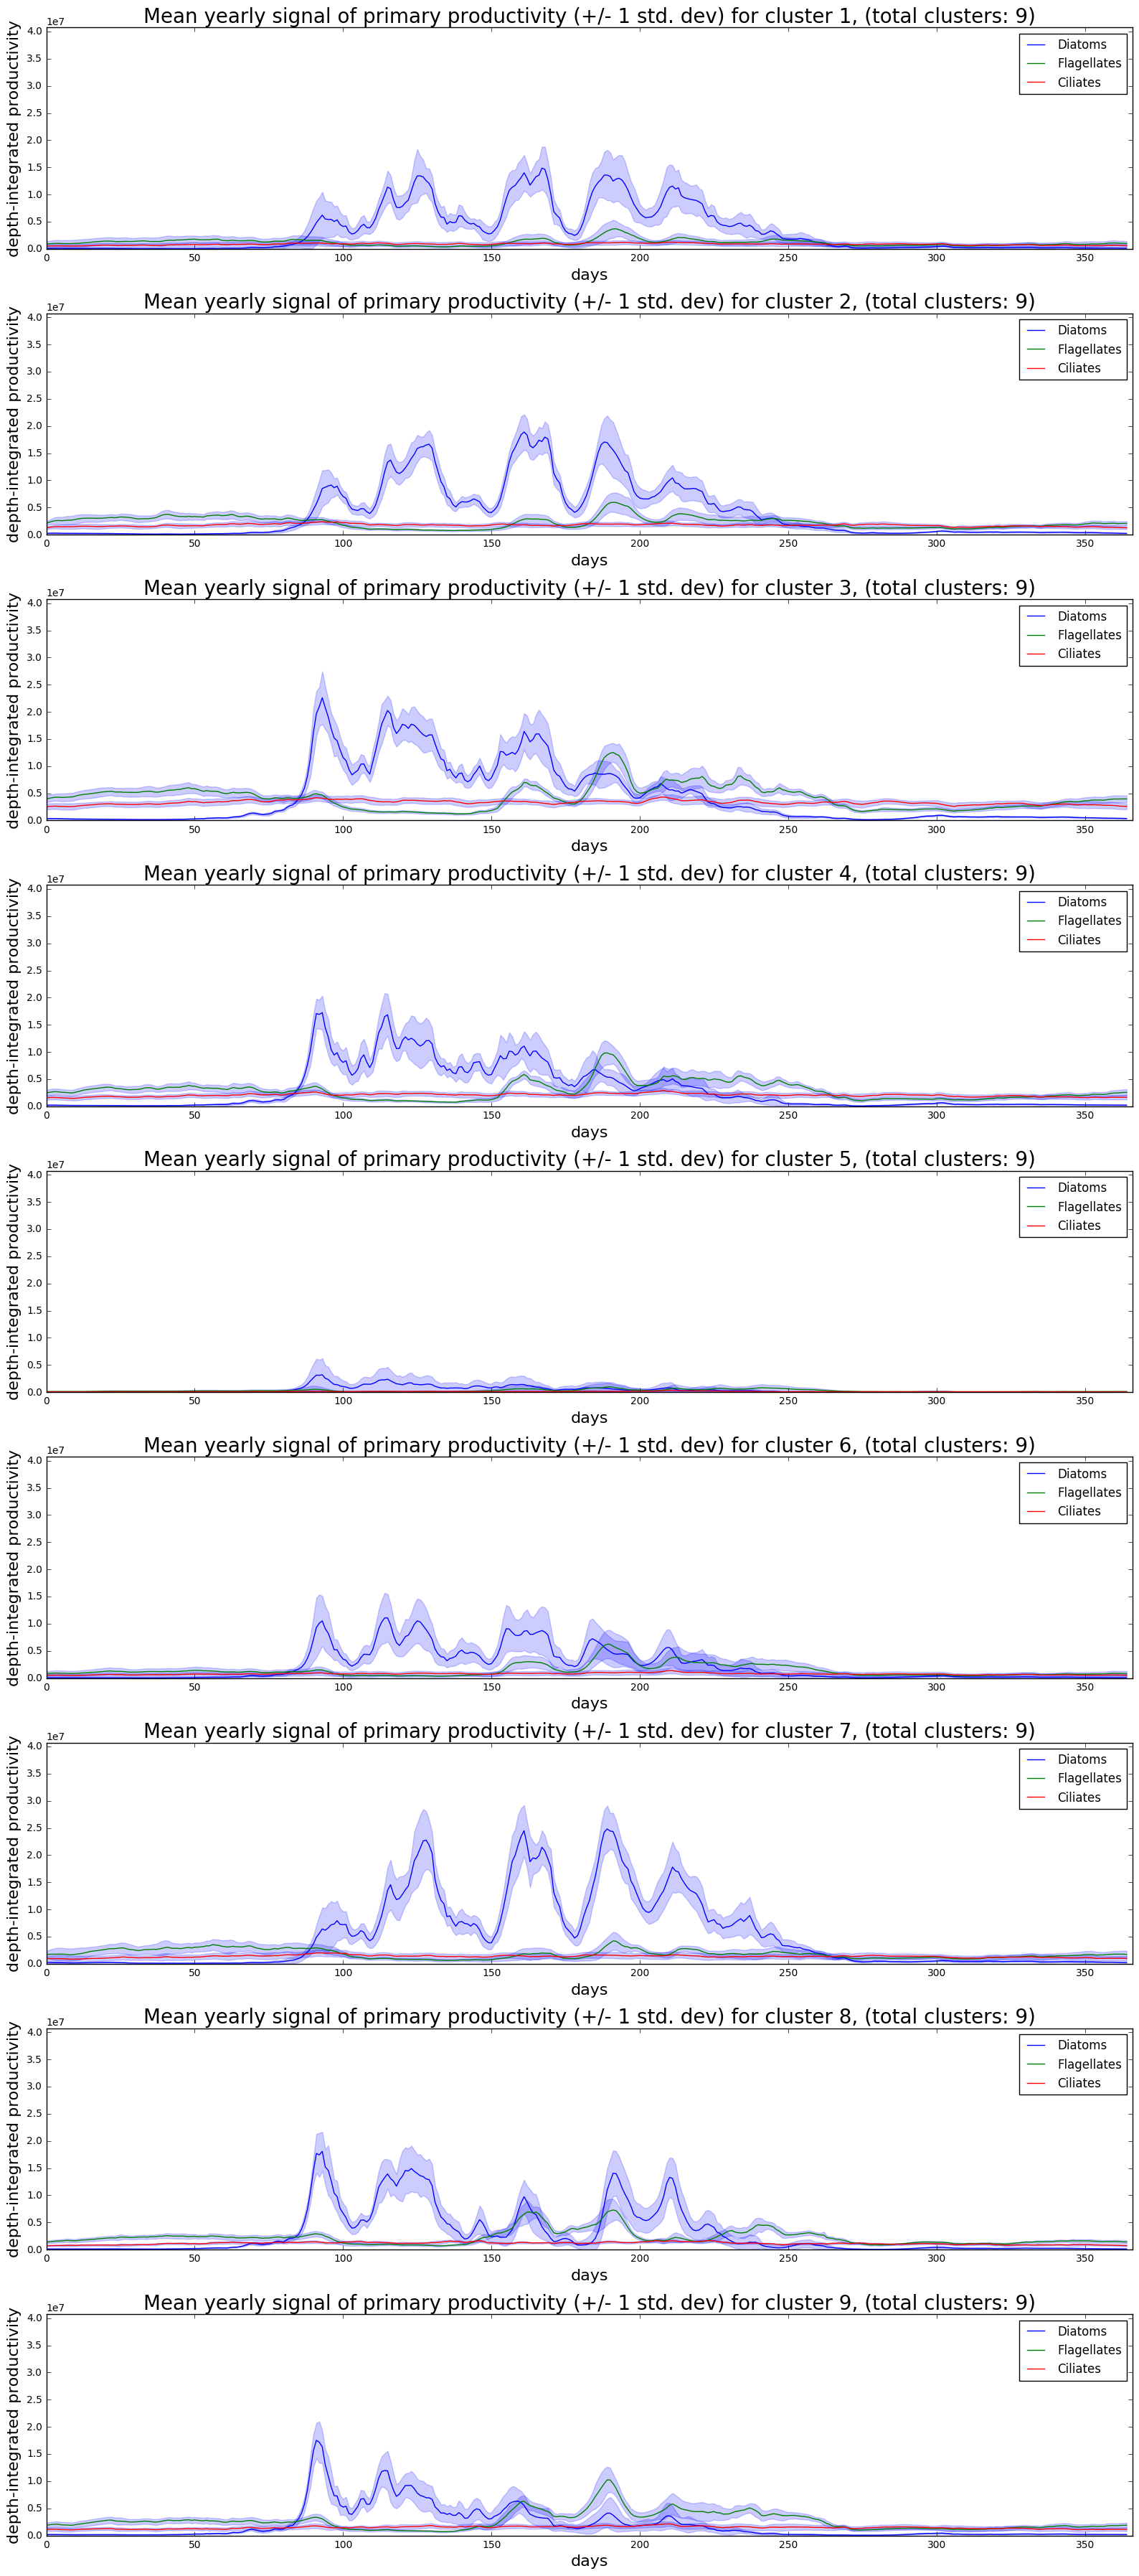

10
10
[ 7  7  7  7  7  7  7  7  8  8  3  1  3  3  3  3  3  1  1  1  1  1  1  1
  1  1  1  1  2  1  1  1  1  1  1  1  1  4  4  1  1  7  2  1  4  4  4  1
  1  8  3  2  1  1  4  4  1  2  1  1  1  4  4  2  1  1  1  4  4  3  2  4
  1  4  4  2  4  4  4  4  1  4  4  4  8  8  8  8  6  3  1  4  4  4  3  7
  8  9  9  9  9  9 10  3  1  4  4 10 10 10 10 10 10  9  9  9  9  9  9  9
  9  9  9 10  2  4  4 10 10 10 10 10 10 10  9  9  9  9  9  9  9  9  9  9
 10 10  3  1  1  4  4  4 10 10 10 10 10 10 10 10 10  9  9  9  9  9  9  9
  1  1  4  4  4  4 10 10 10 10 10 10 10 10 10 10  9  9  9  9  9  9  9 10
  1  3  3  4  4  4  8 10 10 10 10 10 10 10 10  9  9  9  9  9  9  4 10  2
  4  4  4  8  4 10 10 10 10 10  9  9  9  9  4  8  2  4  4  4  8 10 10 10
 10 10 10 10 10 10  9  9  9  6  6  1  1  2  2  4  4  4  8  8 10 10 10 10
 10 10 10 10 10 10 10 10  9  9  6  6  6  6  1  3  4  3  4  4  8  8  8  8
  8  8 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  9  6  6  2  3
  4  4  4  8  4  8  5  5  5  8  8 10 10  8 10

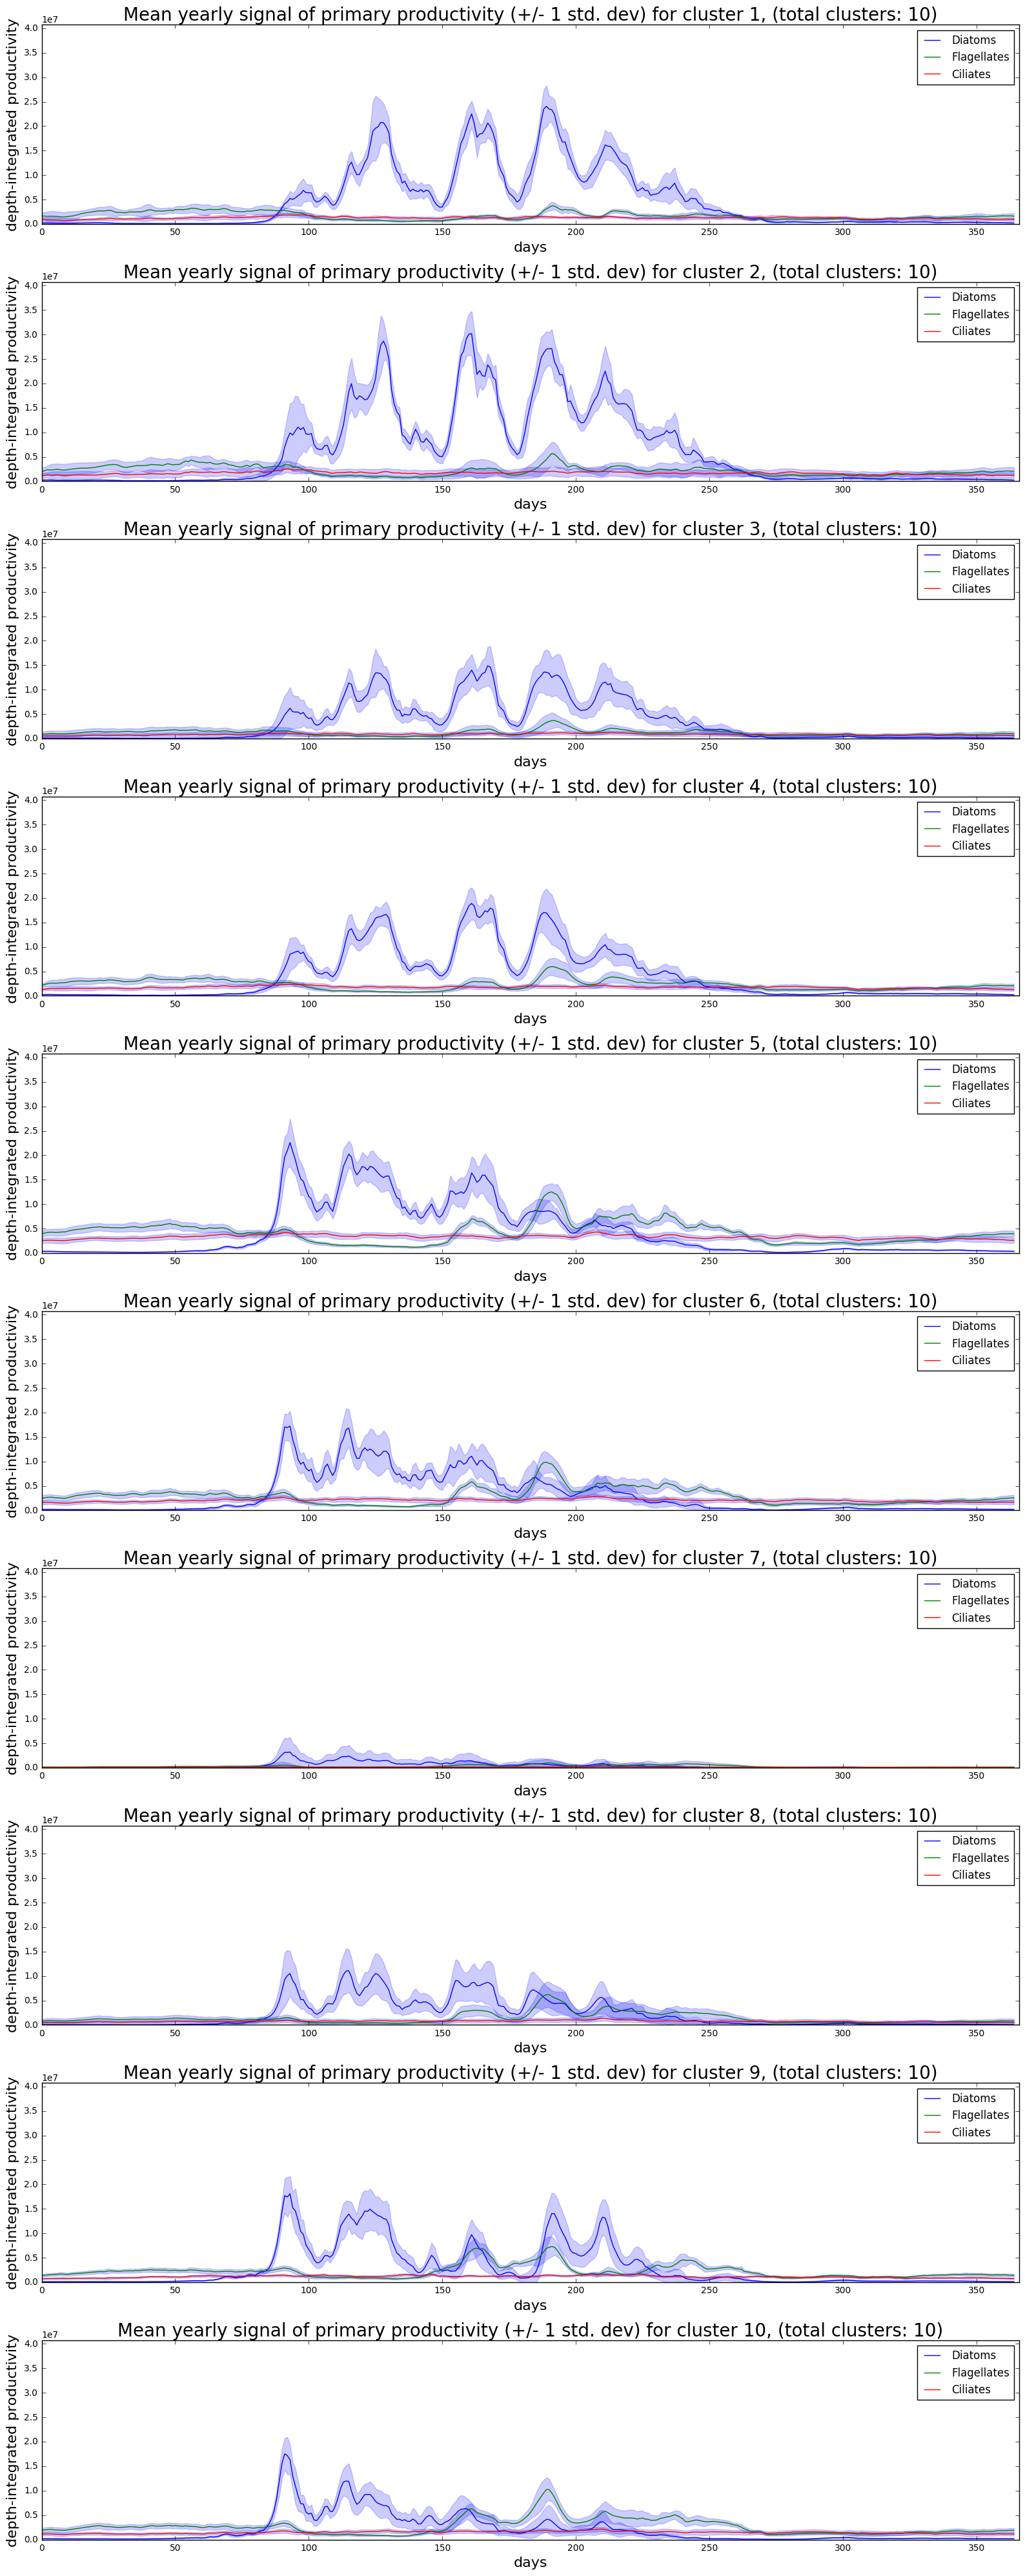

11
11
[ 9  9  9  9  9  9  9  9  1  1  5  3  5  5  5  5  5  3  3  3  3  3  3  3
  3  3  3  3  4  3  3  3  3  3  3  3  3  6  6  3  3  9  4  3  6  6  6  3
  3  1  5  4  3  3  6  6  3  4  3  3  3  6  6  4  3  3  3  6  6  5  4  6
  3  6  6  4  6  6  6  6  3  6  6  6  1  1  1  1  8  5  3  6  6  6  5  9
  1 10 10 10 10 10 11  5  3  6  6 11 11 11 11 11 11 10 10 10 10 10 10 10
 10 10 10 11  4  6  6 11 11 11 11 11 11 11 10 10 10 10 10 10 10 10 10 10
 11 11  5  3  3  6  6  6 11 11 11 11 11 11 11 11 11 10 10 10 10 10 10 10
  3  3  6  6  6  6 11 11 11 11 11 11 11 11 11 11 10 10 10 10 10 10 10 11
  3  5  5  6  6  6  2 11 11 11 11 11 11 11 11 10 10 10 10 10 10  6 11  4
  6  6  6  2  6 11 11 11 11 11 10 10 10 10  6  1  4  6  6  6  2 11 11 11
 11 11 11 11 11 11 10 10 10  8  8  3  3  4  4  6  6  6  2  1 11 11 11 11
 11 11 11 11 11 11 11 11 10 10  8  8  8  8  3  5  6  5  6  6  2  2  2  2
  2  2 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 10  8  8  4  5
  6  6  6  1  6  2  7  7  7  1  1 11 11  1 11

In [ ]:
## Load data and pick cluster number
vr = 'bio'
ts = 'primary productivity'
year = '2013'
#fname = vr + '_' + year + 'clN.mat'
noday = 365

fname = './datamats/' + vr + '_' + year + 'hind_cl.mat'
fname2 = './datamats/' + vr + '_' + year + 'hind.mat'
ylb = 'primary productivity'


if year == '2016':
    noday = 366

else:
    noday = 365
tdir = '/data/tjarniko/MEOPAR/at3/notebooks/CLUSTER/verze2pt0/hind_clfxn/maps_signals_nclust/clmats/'
walrus = sio.loadmat(fname)
walrus2 = sio.loadmat(fname2)
print(walrus)

signalmat = (walrus2['datamat'])


no_cl = [1,2,3,4,5,6,7,8,9,10,11,12]
clusters = (walrus['clusters'])
sigmat = (walrus2['datamat'])
var_to_include = [0,1,2]


range_min = 0
range_max = np.max(sigmat) * 1.05

for i in range(0,len(no_cl)):
    print(no_cl[i])
    #this cluster number
    t_cl = no_cl[i]
    print(t_cl)
    #cluster designation
    cl_des = (clusters[t_cl-1,:])
    print(cl_des)
    
    #mean_patterns, std_dev_patterns = cf.find_mean_patterns(sigmat,t_cl,cl_des,noday)
    mean_patterns, std_dev_patterns = cf.find_mean_patterns_mv(sigmat,t_cl,cl_des,var_to_include, noday)
    print(max(no_cl))
    #print(mean_patterns)
    print(mean_patterns.shape)
    fig = plt.figure(figsize=(16,4*t_cl))
    no_clusters = t_cl
    cln2 = str(no_clusters)

    if len(cln2) ==1:
        cln2 = '0'+cln2
    for j in range(1,no_clusters+1):
        
        ax = fig.add_subplot(no_clusters,1,j)
        for w in range(0,3):
            pattern = mean_patterns[j-1,:,w]
            st_dev = std_dev_patterns[j-1,:,w]
            days = np.arange(noday)
        
            ax.plot(days,pattern)
            ax.fill_between(days,pattern+st_dev,pattern-st_dev, color = 'b', alpha = 0.2)

        ax.set_ylim([0,range_max])
        ax.set_xlim([0,366])
        plt.xlabel('days', fontsize=16)
        plt.ylabel('depth-integrated productivity', fontsize=16)
        plt.legend(['Diatoms','Flagellates','Ciliates'])
        titstring = 'Mean yearly signal of ' + ts +' (+/- 1 std. dev) for cluster ' + str(j) + ', (total clusters: ' + str(no_clusters) + ')'
        ax.set_title(titstring, fontsize = 20)
        


    fname = './figs/' + vr + year + 'sig_cl_' + str(cln2) + '.png'
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig(fname)

    plt.show()
    

## Figure for poster


In [ ]:
no_cl = [9]
clusters = (walrus['clusters'])
sigmat = (walrus['datamat'])
var_to_include = [0,1,2]
cl_show = 2

range_min = 0
#range_max = np.max(sigmat) * 1.05

for i in range(0,len(no_cl)):
    print(no_cl[i])
    #this cluster number
    t_cl = no_cl[i]
    print(t_cl)
    #cluster designation
    cl_des = (clusters[t_cl-1,:])
    print(cl_des)
    
    #mean_patterns, std_dev_patterns = cf.find_mean_patterns(sigmat,t_cl,cl_des,noday)
    mean_patterns, std_dev_patterns = cf.find_mean_patterns_mv(signalmat,t_cl,cl_des,var_to_include, 366)
    print(max(no_cl))
    #print(mean_patterns)
    print(mean_patterns.shape)
    fig = plt.figure(figsize=(16,4*cl_show))
    no_clusters = t_cl
    for j in range(1,cl_show+1):
        t_c = 6 + j
        t_c2 = [2,7]
        ax = fig.add_subplot(cl_show,1,j)
        for w in range(0,3):
            t_c = t_c2[j-1]
            pattern = mean_patterns[t_c-1,:,w]
            pattern = pattern/218509
            st_dev = std_dev_patterns[t_c-1,:,w]
            st_dev = st_dev/218509
            days = np.arange(noday)
        
            ax.plot(days,pattern)
            ax.fill_between(days,pattern+st_dev,pattern-st_dev, color = 'b', alpha = 0.2)

        ax.set_ylim([0,160])
        ax.set_xlim([0,365])
        if j ==1:
            ax.set_xticklabels([])
            plt.legend(['cl. 2 - Diatoms','cl. 2 - Flagellates','cl. 2 - M. rubrum'], fontsize = 30)
        if j == 2:
            plt.xlabel('days', fontsize=20)
            plt.xticks(fontsize = '20')
            plt.legend(['cl. 7 - Diatoms','cl. 7 - Flagellates','cl. 7 - M. rubrum'], fontsize = 30)
        plt.ylabel('mmol N m$^{-2}$', fontsize=30)
        plt.yticks(fontsize = '25')
        #plt.legend(['Diatoms','Flagellates','M. rubrum'], fontsize = 20)
        


    fname = './figs/' + vr + year + '_cl_' + str(no_clusters) + 'signals.jpg'
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig(fname)

    plt.show()
    

## 